# Homwork 2 - marketing strategy
## Year Birth

Interpretation:
- Lorem Ipsum
- Maybe remove outliers
- do I first have to group the data?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

marketing_data = pd.read_csv('marketing_campaign.csv', sep="\t")
mnt = marketing_data.filter(regex='^Mnt.*')
mnt = pd.concat([marketing_data['ID'], mnt], axis=1)
num = marketing_data.filter(regex='^Num.*')
num = pd.concat([marketing_data['ID'], num], axis=1)
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [2]:
from sklearn.cluster import KMeans

data = pd.concat([marketing_data['Year_Birth'], mnt['MntMeatProducts']], axis=1)
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [3]:
data = data.groupby('Year_Birth')['MntMeatProducts'].mean().reset_index()
data

,Year_Birth,MntMeatProducts
0,1893,5.000000
1,1899,562.000000
2,1900,8.000000
3,1940,7.000000
4,1941,716.000000
5,1943,304.857143
6,1944,274.857143
7,1945,301.625000
8,1946,185.187500
9,1947,410.687500


AttributeError: module 'matplotlib.pyplot' has no attribute 'plo'

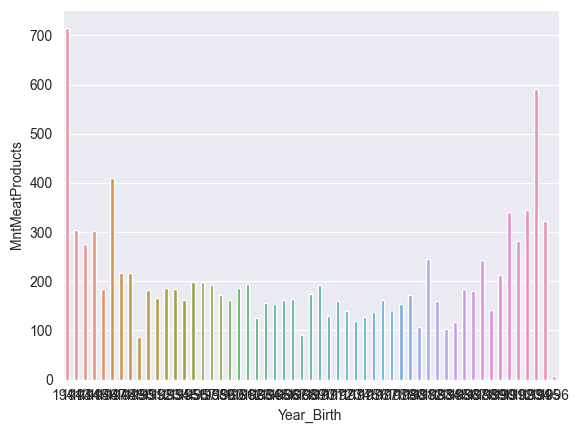

In [4]:
import seaborn as sns

plot = sns.barplot(x=data['Year_Birth'][4:], y=data['MntMeatProducts'][4:], width=0.4)
plt.plo